In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### 1.What is a Decision Tree and how does it make decisions?
A Decision Tree is a supervised learning model that splits data into branches based on feature conditions. It makes decisions by following these branches until reaching a leaf node that gives the final prediction


##### 2.What does a split criterion mean in a Decision Tree?
A split criterion in a Decision Tree is the rule used to decide how to divide data at each node. It measures how well a feature separates the classes (e.g., using Gini impurity, Entropy/Information Gain, or Variance Reduction) to choose the best split for building the tree.


#### 3.Difference between Gini Impurity and Entropy.

- Gini focuses on misclassification probability, while Entropy focuses on information gain (uncertainty reduction).
- Both usually give similar splits, but Gini is computationally simpler, whereas Entropy is more interpretable in terms of information theory.


##### 4.Why do Decision Trees tend to overfit?
Decision Trees tend to overfit because they keep splitting until they perfectly classify the training data, capturing noise and irrelevant patterns. This makes them very accurate on training data but less generalizable to unseen data.


##### 5.What role does the max_depth parameter play?
The max_depth parameter in a Decision Tree controls how many levels the tree can grow. By limiting depth, it prevents the tree from becoming too complex and overfitting, ensuring better generalization to unseen data.



#### Load the dataset and display:
- Shape of the dataset
- Column names
- First 5 rows


In [8]:
dataset=pd.read_csv("heart.csv")

In [9]:
dataset.shape

(1025, 14)

In [10]:
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [12]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Identify:
- Target column
- Feature columns


In [73]:
x=dataset[feature_names]
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [75]:
y=dataset["target"]
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

### Check and report:
- Missing values
- Data types


In [76]:
dataset.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [77]:
dataset.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

### Data Preprocessing
- Handle missing values (if any)

- Separate:Features (X),Target (y)

- Split the dataset:
- Training set – 80%
- Testing set – 20%
- Use random_state=42

#### there is no missing values in the dataset

In [78]:
x=dataset.iloc[:,:-1].values ## features in x
y=dataset.iloc[:,-1].values  ## target in y


In [79]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### Model Building
- Create a Decision Tree Classifier with:
- criterion='gini'
- random_state=42
- Train the model on training data.
- Predict on the test data.


In [80]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='gini') ## object creation
classifier

DecisionTreeClassifier()

In [81]:
classifier.fit(x_train,y_train) ## fit the model

DecisionTreeClassifier()

In [82]:
y_pred=classifier.predict(x_test)
y_pred

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0])

### Model Evaluation
- Compute:
- Accuracy score
- Confusion matrix (visit this after evaluation metrics for classification are taught)
- Classification report (visit this after evaluation metrics for classification are taught)
### Answer:
- Which class is predicted better?
- Is the model overfitting or underfitting?


In [83]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [84]:
accuracy_score(y_test,y_pred)

0.9853658536585366

<Axes: >

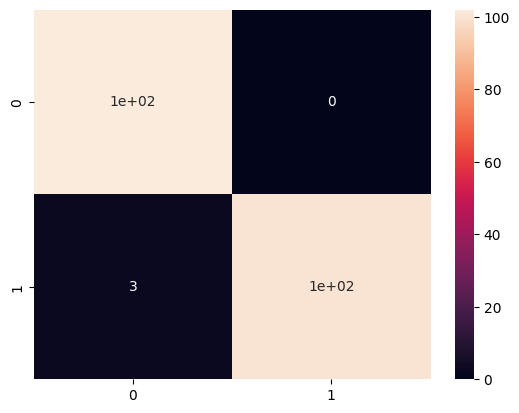

In [85]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

- If the confusion matrix shows that class 0 (no disease) has higher true positives and fewer misclassifications compared to class 1, then class 0 is predicted better.
- Conversely, if class 1 (disease) has stronger recall and precision, then class 1 is predicted better.

- If the confusion matrix shows that class 0 (no disease) has higher true positives and fewer misclassifications compared to class 1, then class 0 is predicted better.
- Conversely, if class 1 (disease) has stronger recall and precision, then class 1 is predicted better.




### What happens when the tree is very shallow (max_depth=2)?
- The model is too simple.
- It cannot capture complex relationships in the data.
- Result: Low training accuracy and low testing accuracy → underfitting


### 2. What happens when the tree is very deep (max_depth=None)?
- The tree grows until all leaves are pure (perfectly classifies training data).
- Training accuracy becomes 100%.
- But it memorizes noise and small variations in the dataset.
- Result: Very high training accuracy but poor testing accuracy → overfitting


### Which model performs best and why?
- Model 2 (max_depth=5) usually performs best.
- It balances complexity and generalization.
- Training accuracy is high but not perfect, and testing accuracy is better than both shallow and deep trees.
- This is the sweet spot where the model captures important patterns without memorizing noise.


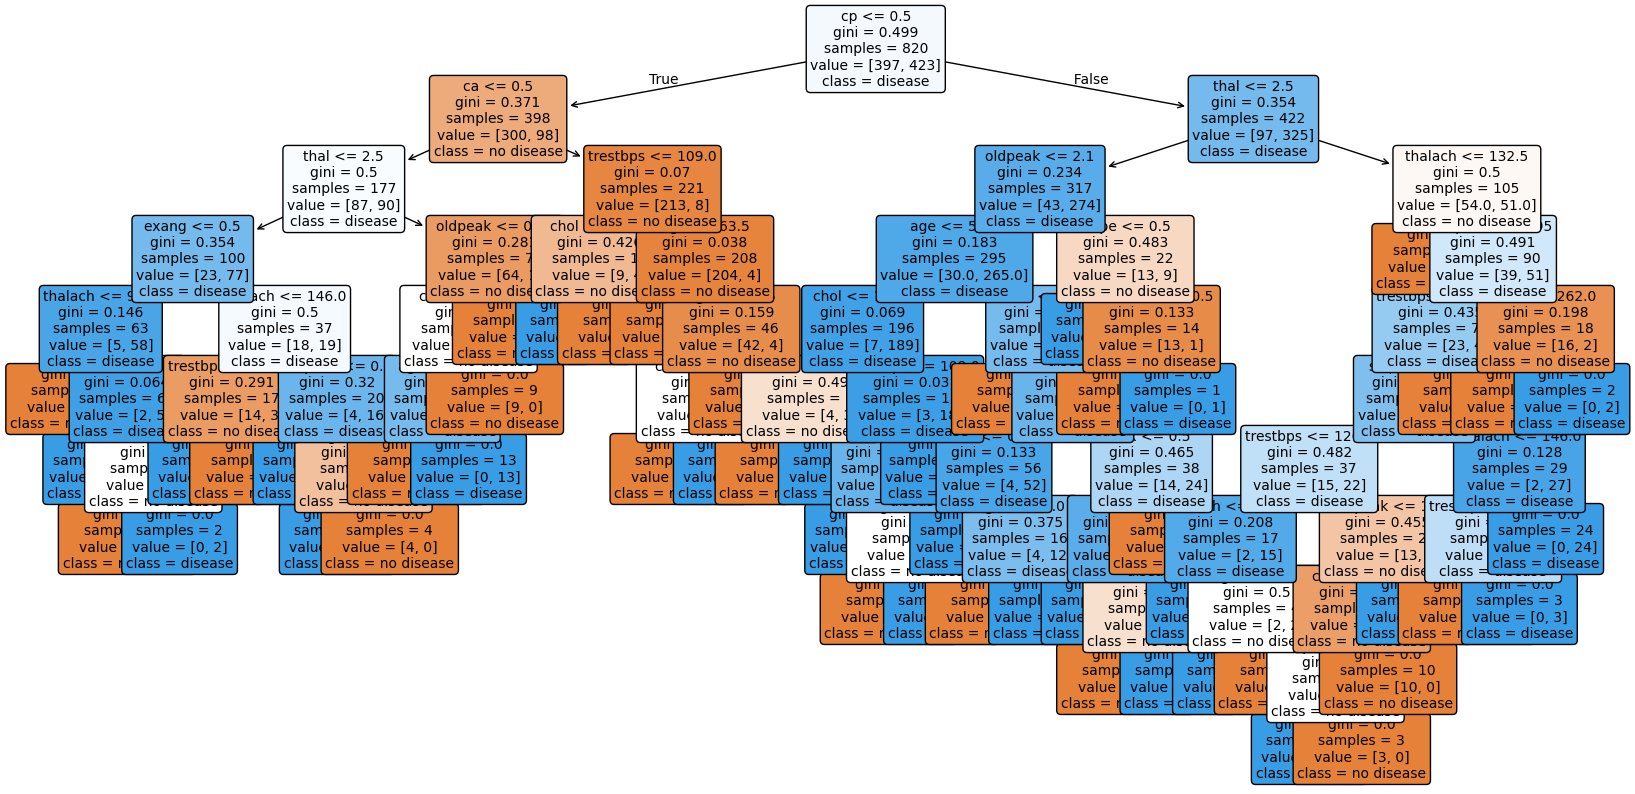

In [90]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(classifier,feature_names=feature_names,
          class_names=["no disease","disease"],
          filled=True,
          rounded=True,
          fontsize=10)
plt.show()

### Reflection Questions
##### Why are Decision Trees suitable for medical datasets?

- Handle mixed data types: Medical datasets often include both numerical (blood pressure, cholesterol) and categorical (chest pain type, ECG results) features. Decision trees can process both seamlessly.
- Robust to missing values: Trees can split on available features even when some patient data is missing, which is common in clinical records.
- Non-linear relationships: Medical risk factors interact in complex, non-linear ways. Trees can capture these interactions without requiring explicit transformations.
- Clinical decision support: They mimic the way doctors reason through symptoms and test results, making them intuitive for diagnostic tasks.



#### What Makes Decision Trees Easy to Interpret
- Visual representation: Trees can be plotted as flowcharts, showing step-by-step decisions (e.g., “If cholesterol > 250 and age > 60 → higher risk”).
- Human-like reasoning: Each split corresponds to a simple rule, similar to how clinicians ask sequential questions.
- Transparency: Unlike black-box models (e.g., neural networks), trees clearly show which features drive predictions.
- Rule extraction: Decision paths can be converted into if-then rules, which are easy to communicate to non-technical stakeholders.




#### Why Decision Trees Are Commonly Used in Ensemble Methods
- Weak learners: A single tree may be unstable or prone to overfitting, but combining many trees improves robustness.
- Bagging (Random Forests): Multiple trees trained on bootstrapped samples reduce variance and improve accuracy.
- Boosting (XGBoost, AdaBoost): Sequentially trained trees correct errors from previous ones, leading to strong predictive performance.
- Scalability: Trees are computationally efficient, making them practical for large ensembles.
- Versatility: They serve as the backbone of many ensemble techniques because they adapt well to diverse data and provide strong baseline performance.





1. Gini vs. Entropy
- Both are ways the tree decides where to split the data.
- Gini: Faster, usually gives good results.
- Entropy: Uses information theory, a bit slower, but very similar in outcomes.

2. min_samples_leaf
- This sets the minimum number of patients (rows) that must be in a leaf (final box of the tree).
- Small value (like 1): Tree grows very deep → memorizes training data → overfits.
- Bigger value (like 5 or 10): Tree is simpler → avoids overfitting → may miss small details.

3. Conclusion
- Shallow tree: Too simple → misses patterns (underfits).
- Deep tree: Too complex → memorizes data (overfits).
- Balanced tree (depth ~5, min_samples_leaf ~5): Best performance → learns patterns but still generalizes well.
- Criterion: Gini is usually enough, entropy is fine too.

